In [7]:
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=3,suppress=True)

labels = {0:'l-jet',4:'c-jet',5:'b-jet',11:'elec',13:'muon',15:'tau',20:'bc-jet',40:'jet'}
comb_jets = True

x_labels_id = [0,4,5,11,13]
if comb_jets:
  x_labels_id = [40,11,13]
x_labels_str = [labels[i] for i in x_labels_id]
nlabels=len(x_labels_id)

# handle stupid colormap being too long
from mpl_toolkits.axes_grid1 import make_axes_locatable
def colorbar(mappable):
  ax = mappable.axes
  fig = ax.figure
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  return fig.colorbar(mappable, cax=cax)

def combine_ljets(mat):
  # combines udsc-jet
  matA = np.sum(mat[0:2,...],axis=0)
  matB = np.array([matA,mat[2],mat[3],mat[4]])
  matC = np.sum(matB[...,0:2],axis=1)
  mat = np.array([matC,matB[...,2],matB[...,3],matB[...,4]]).transpose()
  return mat

def combine_jets(mat):
  # combines udsc-jet
  matA = np.sum(mat[0:3,...],axis=0)
  matB = np.array([matA,mat[3],mat[4]])
  matC = np.sum(matB[...,0:3],axis=1)
  mat = np.array([matC,matB[...,3],matB[...,4]]).transpose()
  return mat

In [8]:
'''mat = [[6333,17,1135,40],
[2784,12,884,6],
[2246,7,1387,2],
[28,0,1,5102]]'''
'''mat = [[6333,17,1135,40],
[2784,12, 884,6],
[2246,7,1387,2],
[28,0 ,1,5102]]'''
mat = """6741   0    761   23
3016   0   669    1
2452   1   1189  0
21        0   1        5109"""
mat = mat.split()
mat = [ [int(mat[i*4 + j]) for j in range(4)] for i in range(4)]

# 1820390_model_00008_00800
matA = [[2163. ,1718. ,1008.,    5.],
 [ 238.,  231.,  191.,    0.],
 [1377., 1832., 2574.,    0.],
 [  19.,    8.,    8., 3788.]]

# 1820893_model_00005_01300
matB = [[1.800e+03,1.368e+03 ,7.200e+02, 3.000e+00],
 [4.880e+02, 4.890e+02, 3.650e+02, 0.000e+00],
 [1.491e+03, 1.925e+03, 2.685e+03, 0.000e+00],
 [1.800e+01, 7.000e+00, 1.100e+01, 3.790e+03]]

# 1820893_model_00011_00600
matC = [[1.807e+03, 1.379e+03, 7.170e+02, 8.000e+00],
 [3.190e+02, 3.460e+02, 2.670e+02, 0.000e+00],
 [1.657e+03, 2.057e+03, 2.788e+03, 1.000e+00],
 [1.400e+01, 7.000e+00, 9.000e+00, 3.784e+03]]

# 1821980_model_00006_02000
matD = [[2.175e+03, 1.771e+03, 1.034e+03, 1.000e+01],
 [3.380e+02, 3.490e+02, 3.250e+02, 0.000e+00],
 [1.272e+03, 1.661e+03, 2.415e+03, 1.000e+00],
 [1.200e+01, 8.000e+00, 7.000e+00, 3.782e+03]]

# 1823897_model_00009_00500.torch_model_state_dict
mat = [[1.943e+03, 1.559e+03, 9.020e+02, 6.000e+00, 3.000e+00],
 [6.470e+02, 6.360e+02, 5.920e+02, 0.000e+00, 0.000e+00],
 [1.216e+03, 1.638e+03, 2.329e+03, 0.000e+00, 9.000e+00],
 [3.500e+01, 6.000e+00, 5.000e+00, 3.835e+03, 7.000e+00],
 [1.000e+00, 2.000e+00, 7.000e+00, 3.000e+00, 3.819e+03]]


mat = np.array(mat)
print('mat')
print(mat)

if comb_jets:
  mat = combine_jets(mat)


s = mat.sum(axis=0)
mat = np.divide(mat,s,where=s!=0,out=np.zeros(mat.shape))
print('norm')
print(mat)
#mat = np.array(pt_mat)

mat
[[1943. 1559.  902.    6.    3.]
 [ 647.  636.  592.    0.    0.]
 [1216. 1638. 2329.    0.    9.]
 [  35.    6.    5. 3835.    7.]
 [   1.    2.    7.    3. 3819.]]
norm
[[0.995 0.002 0.003]
 [0.004 0.998 0.002]
 [0.001 0.001 0.995]]


matrix: Columns are predictions, rows are groundtruth

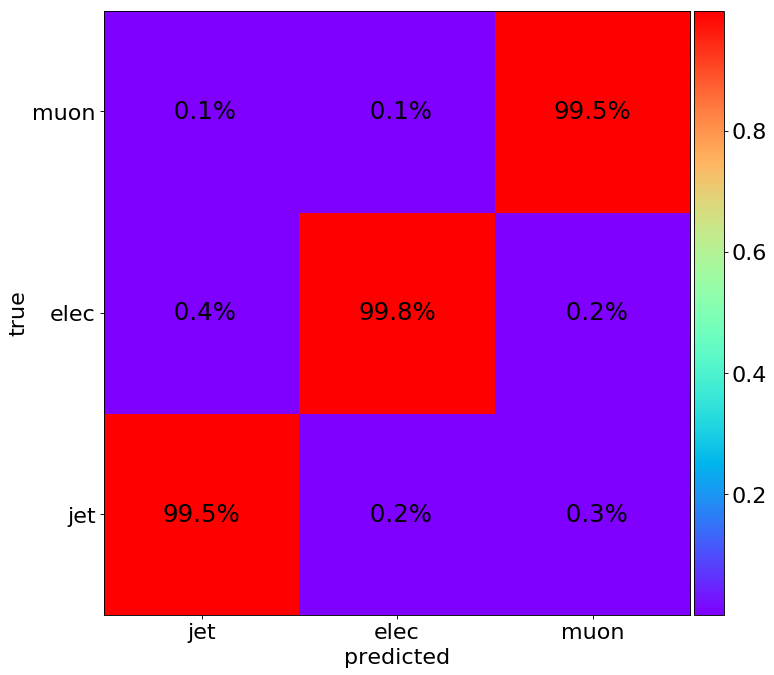

In [9]:
# add extent to figure to help place labels
x_start = 0.0
x_end = len(x_labels_id)
y_start = 0.0
y_end = len(x_labels_id)
extent = [x_start, x_end, y_start, y_end]

def plot_matrix(mat,title=''):
    fig,ax = plt.subplots(figsize=(10,10),dpi=80)
    im = ax.imshow(mat, extent=extent, origin='lower', interpolation='None', cmap='rainbow',aspect='equal')
    ax.set_xticks(np.array(range(nlabels))+0.5)
    ax.set_xticklabels(x_labels_str,fontsize=20)
    ax.set_yticks(np.array(range(nlabels))+0.5)
    ax.set_yticklabels(x_labels_str,fontsize=20)
    ax.set_ylabel('true',fontsize=20)
    ax.set_xlabel('predicted',fontsize=20)
    ax.set_aspect('auto')

    # Add the text
    jump_x = (x_end - x_start) / (2.0 * nlabels)
    jump_y = (y_end - y_start) / (2.0 * nlabels)
    x_positions = np.linspace(start=x_start, stop=x_end, num=nlabels, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=nlabels, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = '%4.1f%%' % (mat[y_index, x_index]*100.)
            #label = '%d' % mat[y_index][x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax.text(text_x, text_y, label, color='black', ha='center', va='center',fontsize=22)

    cbar = colorbar(im)
    cbar.ax.tick_params(labelsize=20)
    plt.suptitle(title,fontsize=20,ha='center')
    plt.show()

plot_matrix(mat)